In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline

import mysql.connector

db = mysql.connector.connect(host="localhost", 
                             user="python_user", 
                             passwd="password2018", 
                             db = "adventureworks"
                            )
print (db)

In [2]:
df = pd.read_sql('SELECT * FROM employee', db)
df.head()

,EmployeeID,NationalIDNumber,ContactID,LoginID,ManagerID,Title,BirthDate,MaritalStatus,Gender,HireDate,SalariedFlag,VacationHours,SickLeaveHours,CurrentFlag,rowguid,ModifiedDate
0,1,14417807,1209,adventure-works\guy1,16.0,Production Technician - WC60,1972-05-15,M,M,1996-07-31,0,21,30,1,"[74, 208, 225, 170, 55, 194, 116, 73, 180, 213...",2004-07-30 19:00:00
1,2,253022876,1030,adventure-works\kevin0,6.0,Marketing Assistant,1977-06-03,S,M,1997-02-26,0,42,41,1,"[64, 2, 72, 27, 192, 149, 15, 65, 167, 23, 235...",2004-07-30 19:00:00
2,3,509647174,1002,adventure-works\roberto0,12.0,Engineering Manager,1964-12-13,M,M,1997-12-12,1,2,21,1,"[44, 251, 187, 155, 187, 239, 23, 66, 154, 183...",2004-07-30 19:00:00
3,4,112457891,1290,adventure-works\rob0,3.0,Senior Tool Designer,1965-01-23,S,M,1998-01-05,0,48,80,1,"[85, 121, 116, 89, 184, 135, 63, 68, 142, 212,...",2004-07-30 19:00:00
4,5,480168528,1009,adventure-works\thierry0,263.0,Tool Designer,1949-08-29,M,M,1998-01-11,0,9,24,1,"[113, 81, 149, 29, 115, 231, 173, 79, 131, 130...",2004-07-30 19:00:00


In [3]:
df = pd.read_sql('SELECT * FROM employee', db)
df = df.drop('rowguid', axis = 1)
df.head()

,EmployeeID,NationalIDNumber,ContactID,LoginID,ManagerID,Title,BirthDate,MaritalStatus,Gender,HireDate,SalariedFlag,VacationHours,SickLeaveHours,CurrentFlag,ModifiedDate
0,1,14417807,1209,adventure-works\guy1,16.0,Production Technician - WC60,1972-05-15,M,M,1996-07-31,0,21,30,1,2004-07-30 19:00:00
1,2,253022876,1030,adventure-works\kevin0,6.0,Marketing Assistant,1977-06-03,S,M,1997-02-26,0,42,41,1,2004-07-30 19:00:00
2,3,509647174,1002,adventure-works\roberto0,12.0,Engineering Manager,1964-12-13,M,M,1997-12-12,1,2,21,1,2004-07-30 19:00:00
3,4,112457891,1290,adventure-works\rob0,3.0,Senior Tool Designer,1965-01-23,S,M,1998-01-05,0,48,80,1,2004-07-30 19:00:00
4,5,480168528,1009,adventure-works\thierry0,263.0,Tool Designer,1949-08-29,M,M,1998-01-11,0,9,24,1,2004-07-30 19:00:00


In [4]:
# What is the average total pay rate, vacation time and total personal time off by company title? 
pd.options.display.max_rows = 999
exec_pay = pd.read_sql('SELECT Title, AVG(Rate) AS TotalPay, SUM(VacationHours) AS TotalVacation, SUM(SickLeaveHours) AS TotalPTO FROM employee INNER JOIN employeepayhistory ON employee.EmployeeID = employeepayhistory.EmployeeID GROUP BY Title ORDER BY TotalPay DESC;', db)
exec_pay

,Title,TotalPay,TotalVacation,TotalPTO
0,Chief Executive Officer,125.500000,99.0,69.0
1,Vice President of Production,84.134600,64.0,52.0
2,Vice President of Sales,72.115400,10.0,25.0
3,Vice President of Engineering,63.461500,1.0,20.0
4,Information Services Manager,50.480800,65.0,52.0
5,Chief Financial Officer,49.237967,0.0,60.0
6,Pacific Sales Manager,48.101000,20.0,30.0
7,North American Sales Manager,48.101000,14.0,27.0
8,European Sales Manager,48.101000,21.0,30.0
9,Research and Development Manager,46.480800,77.0,114.0


In [5]:
# What is the average cost per color for each product? 
df1 = pd.read_sql('SELECT AVG(StandardCost) AS CostPerColor, Color FROM product WHERE Color IS NOT NULL GROUP BY Color ORDER BY CostPerColor DESC;', db)
df1

,CostPerColor,Color
0,858.178055,Red
1,597.434781,Yellow
2,567.159477,Blue
3,466.512751,Silver
4,415.446239,Black
5,51.562500,Grey
6,34.031775,Multi
7,28.424286,Silver/Black
8,3.379300,White


In [6]:
color_df = pd.read_sql("SELECT AVG(StandardCost)-AVG(ListPrice) AS RevenuePerColor, Color FROM product WHERE StandardCost IS NOT NULL AND StandardCost > '0' AND Color IS NOT NULL GROUP BY Color ORDER BY RevenuePerColor DESC;", db)
color_df

,RevenuePerColor,Color
0,-5.865700,White
1,-25.833225,Multi
2,-35.594286,Silver/Black
3,-73.437500,Grey
4,-323.592807,Black
5,-356.519754,Blue
6,-361.656608,Yellow
7,-458.418936,Silver
8,-543.771945,Red


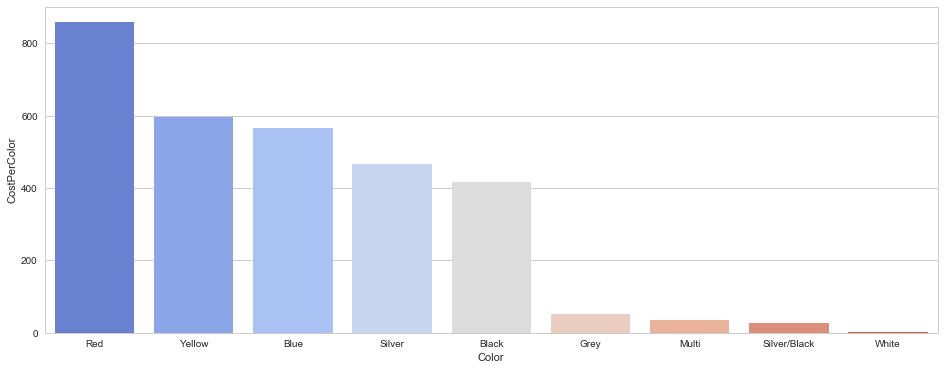

In [7]:
import seaborn as sns 
sns.set(style = "whitegrid")
plt.figure(figsize = (16, 6))
ax = sns.barplot(x = "Color", y = "CostPerColor", data=df1, palette = "coolwarm")

In [8]:
df2 = pd.read_sql("SELECT Name, Color, ListPrice, StandardCost FROM product WHERE StandardCost BETWEEN '26' AND '250' AND COLOR = 'Black' AND ListPrice >= '100';", db)
df2

,Name,Color,ListPrice,StandardCost
0,"LL Road Frame - Black, 58",Black,337.220,204.6251
1,"LL Road Frame - Black, 60",Black,337.220,204.6251
2,"LL Road Frame - Black, 62",Black,337.220,204.6251
3,"LL Road Frame - Black, 44",Black,337.220,204.6251
4,"LL Road Frame - Black, 48",Black,337.220,204.6251
5,"LL Road Frame - Black, 52",Black,337.220,204.6251
6,"ML Mountain Frame - Black, 38",Black,348.760,185.8193
7,ML Mountain Front Wheel,Black,209.025,92.8071
8,HL Mountain Front Wheel,Black,300.215,133.2955
9,ML Road Front Wheel,Black,248.385,110.2829
